In [2]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/10-44-38/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [5]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. four: 0.1070
	2. rotate: 0.1052
	3. angle: 0.0703
	4. ruby: 0.0651
	5. crimson: 0.0582
	6. corner: 0.0540
	7. quadratic: 0.0491
	8. bottom: 0.0457
	9. triangular: 0.0454
	10. no: 0.0418
	11. shade: 0.0383
	12. scarlet: 0.0331
	13. position: 0.0238
	14. right: 0.0228
	15. cyan: 0.0228
	16. it: 0.0191
	17. transparent: 0.0177
	18. form: 0.0161
	19. locate: 0.0150
	20. navy: 0.0146
	21. unturn: 0.0114
	22. picture: 0.0104
	23. blue: 0.0059
	24. white: 0.0048
	25. background: 0.0030
	26. up: 0.0028
	27. round: 0.0007
	28. color: 0.0005
	29. fern: 0.0004
	30. static: 0.0001
	31. circular: 0.0000
	32. <pad>: 0.0000
	33. turn: 0.0000
	34. cherry: 0.0000
	35. unrotate: 0.0000
	36. olive: 0.0000
	37. azure: 0.0000
	38. fix: 0.0000
	39. three: 0.0000
	40. lapis: 0.0000
	41. left: 0.0000
	42. figure: 0.0000
	43. red: 0.0000
	44. emerald: 0.0000
	45. blank: 0.0000
	46. solid: 0.0000
	47. image: 0.0000
	48. canvas: 0.0000
	49. shape: 0.00

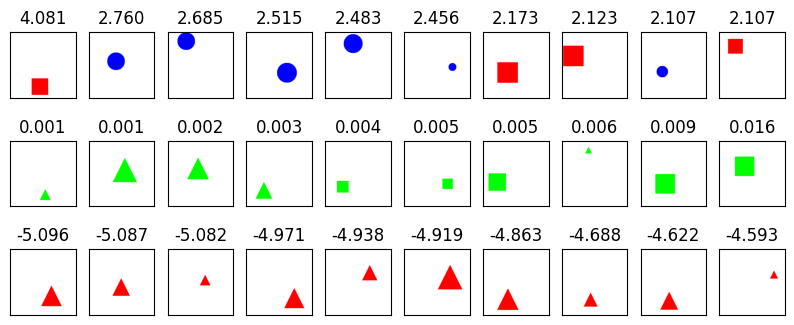

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. photo: 0.1766
	2. blank: 0.1677
	3. fern: 0.1552
	4. image: 0.1540
	5. emerald: 0.1515
	6. green: 0.1508
	7. white: 0.1498
	8. up: 0.1333
	9. shape: 0.1302
	10. cherry: 0.1280
	11. right: 0.1238
	12. canvas: 0.1200
	13. red: 0.1147
	14. static: 0.1110
	15. transparent: 0.0935
	16. turn: 0.0922
	17. olive: 0.0873
	18. it: 0.0835
	19. locate: 0.0832
	20. lime: 0.0730
	21. rotate: 0.0723
	22. round: 0.0692
	23. circular: 0.0687
	24. form: 0.0632
	25. position: 0.0628
	26. solid: 0.0619
	27. unrotate: 0.0619
	28. unturn: 0.0602
	29. picture: 0.0538
	30. background: 0.0506
	31. ruby: 0.0505
	32. scarlet: 0.0490
	33. crimson: 0.0472
	34. no: 0.0460
	35. shade: 0.0397
	36. three: 0.0365
	37. color: 0.0342
	38. fix: 0.0281
	39. left: 0.0246
	40. azure: 0.0179
	41. bottom: 0.0155
	42. corner: 0.0101
	43. blue: 0.007

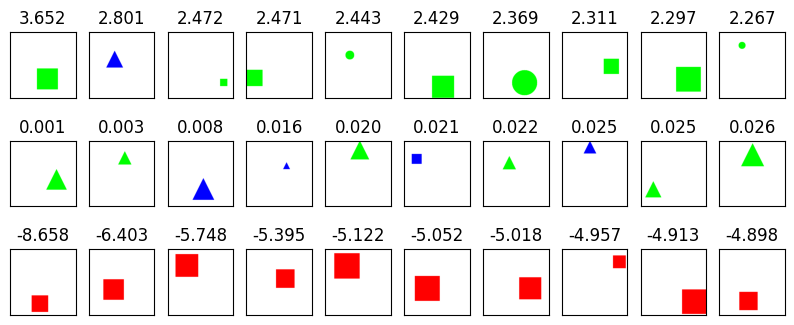

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. lapis: 0.4624
	2. blue: 0.2574
	3. navy: 0.2483
	4. quadratic: 0.1648
	5. cyan: 0.1629
	6. azure: 0.1340
	7. triangular: 0.0764
	8. corner: 0.0758
	9. four: 0.0666
	10. angle: 0.0562
	11. ruby: 0.0496
	12. round: 0.0284
	13. crimson: 0.0219
	14. scarlet: 0.0027
	15. left: 0.0011
	16. rotate: 0.0003
	17. circular: 0.0000
	18. cherry: 0.0000
	19. fern: 0.0000
	20. olive: 0.0000
	21. lime: 0.0000
	22. red: 0.0000
	23. emerald: 0.0000
	24. green: 0.0000
	25. <pad>: 0.0000
	26. three: 0.0000
	27. static: 0.0000
	28. form: 0.0000
	29. figure: 0.0000
	30. no: 0.0000
	31. picture: 0.0000
	32. locate: 0.0000
	33. white: 0.0000
	34. unturn: 0.0000
	35. bottom: 0.0000
	36. background: 0.0000
	37. color: 0.0000
	38. right: 0.0000
	39. photo: 0.0000
	40. turn: 0.0000
	41. unrotate: 0.0000
	42. blank: 0.0000
	43. shape: 

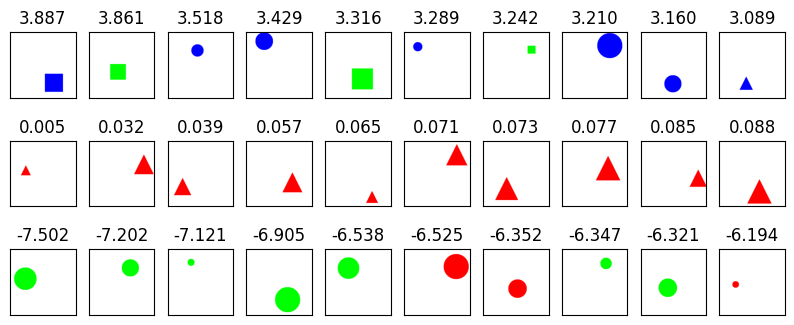

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. quadratic: 0.0728
	2. four: 0.0491
	3. cyan: 0.0180
	4. ruby: 0.0107
	5. navy: 0.0080
	6. lapis: 0.0018
	7. blue: 0.0008
	8. crimson: 0.0004
	9. azure: 0.0002
	10. triangular: 0.0000
	11. circular: 0.0000
	12. round: 0.0000
	13. three: 0.0000
	14. no: 0.0000
	15. fern: 0.0000
	16. cherry: 0.0000
	17. lime: 0.0000
	18. <pad>: 0.0000
	19. olive: 0.0000
	20. emerald: 0.0000
	21. scarlet: 0.0000
	22. turn: 0.0000
	23. transparent: 0.0000
	24. up: 0.0000
	25. image: 0.0000
	26. unrotate: 0.0000
	27. it: 0.0000
	28. picture: 0.0000
	29. unturn: 0.0000
	30. form: 0.0000
	31. solid: 0.0000
	32. left: 0.0000
	33. locate: 0.0000
	34. canvas: 0.0000
	35. fix: 0.0000
	36. background: 0.0000
	37. shape: 0.0000
	38. right: 0.0000
	39. blank: 0.0000
	40. color: 0.0000
	41. static: 0.0000
	42. bottom: 0.0000
	43. white: 0.

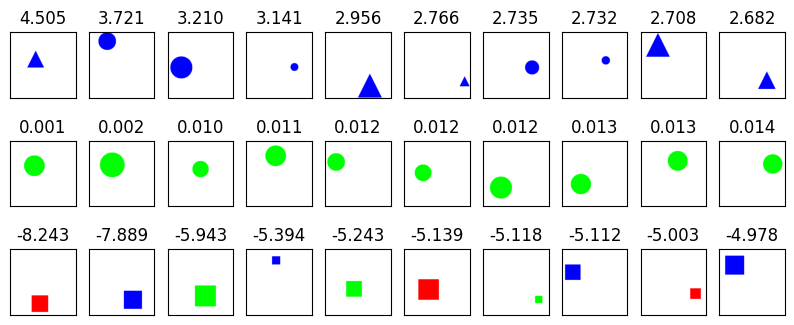

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. three: 0.2438
	2. left: 0.2042
	3. olive: 0.1867
	4. it: 0.1777
	5. green: 0.1639
	6. emerald: 0.1622
	7. fern: 0.1571
	8. round: 0.1514
	9. background: 0.1469
	10. unrotate: 0.1444
	11. lime: 0.1361
	12. position: 0.1290
	13. cherry: 0.1268
	14. image: 0.1231
	15. static: 0.1147
	16. scarlet: 0.1112
	17. azure: 0.1101
	18. fix: 0.0989
	19. figure: 0.0861
	20. canvas: 0.0852
	21. navy: 0.0839
	22. turn: 0.0808
	23. cyan: 0.0788
	24. blue: 0.0770
	25. rotate: 0.0768
	26. right: 0.0665
	27. ruby: 0.0645
	28. crimson: 0.0597
	29. corner: 0.0588
	30. shade: 0.0447
	31. white: 0.0442
	32. locate: 0.0434
	33. up: 0.0410
	34. solid: 0.0329
	35. four: 0.0306
	36. bottom: 0.0247
	37. form: 0.0225
	38. unturn: 0.0157
	39. circular: 0.0155
	40. lapis: 0.0130
	41. quadratic: 0.0129
	42. blank: 0.0105
	43. no: 0.0097
	4

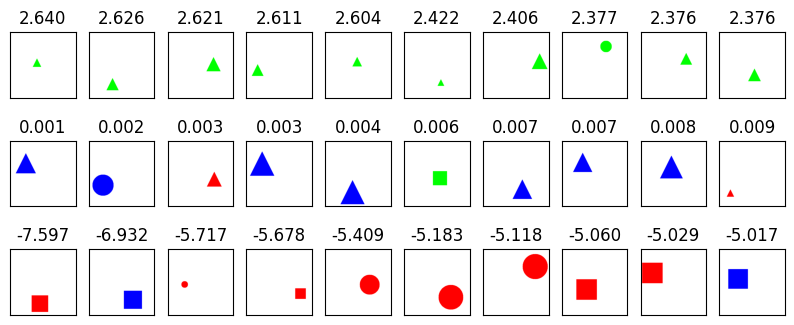

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. shape: 0.2528
	2. form: 0.2434
	3. up: 0.2004
	4. locate: 0.1991
	5. transparent: 0.1807
	6. blank: 0.1302
	7. unturn: 0.1265
	8. static: 0.1015
	9. white: 0.0890
	10. color: 0.0889
	11. ruby: 0.0774
	12. photo: 0.0630
	13. bottom: 0.0614
	14. circular: 0.0608
	15. rotate: 0.0539
	16. olive: 0.0447
	17. triangular: 0.0424
	18. no: 0.0418
	19. solid: 0.0416
	20. crimson: 0.0370
	21. shade: 0.0366
	22. turn: 0.0354
	23. right: 0.0353
	24. angle: 0.0342
	25. red: 0.0278
	26. corner: 0.0272
	27. picture: 0.0236
	28. background: 0.0232
	29. position: 0.0231
	30. quadratic: 0.0144
	31. round: 0.0104
	32. emerald: 0.0070
	33. blue: 0.0011
	34. fern: 0.0009
	35. unrotate: 0.0002
	36. it: 0.0002
	37. fix: 0.0002
	38. image: 0.0002
	39. canvas: 0.0001
	40. three: 0.0000
	41. figure: 0.0000
	42. azure: 0.0000
	43. gre

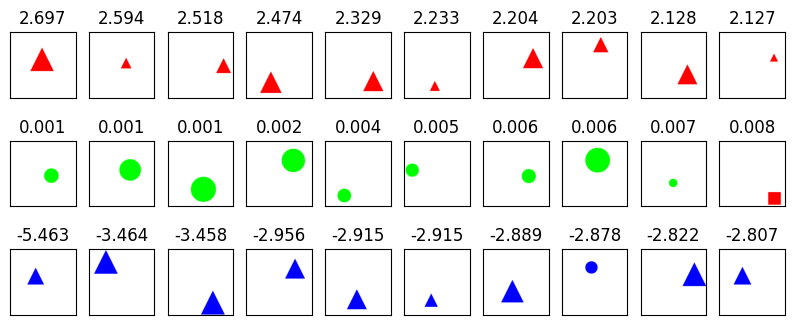

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. angle: 0.1626
	2. triangular: 0.1535
	3. no: 0.1369
	4. rotate: 0.1173
	5. corner: 0.1160
	6. bottom: 0.1111
	7. quadratic: 0.1071
	8. four: 0.1065
	9. shade: 0.0996
	10. crimson: 0.0712
	11. picture: 0.0699
	12. color: 0.0600
	13. circular: 0.0457
	14. ruby: 0.0454
	15. right: 0.0444
	16. scarlet: 0.0434
	17. unturn: 0.0407
	18. position: 0.0371
	19. transparent: 0.0356
	20. navy: 0.0344
	21. solid: 0.0335
	22. locate: 0.0303
	23. fix: 0.0302
	24. background: 0.0241
	25. form: 0.0204
	26. unrotate: 0.0204
	27. figure: 0.0175
	28. white: 0.0160
	29. blank: 0.0064
	30. red: 0.0064
	31. canvas: 0.0063
	32. it: 0.0062
	33. turn: 0.0058
	34. static: 0.0042
	35. cherry: 0.0016
	36. up: 0.0008
	37. olive: 0.0001
	38. photo: 0.0001
	39. lime: 0.0000
	40. round: 0.0000
	41. <pad>: 0.0000
	42. azure: 0.0000
	43. fer

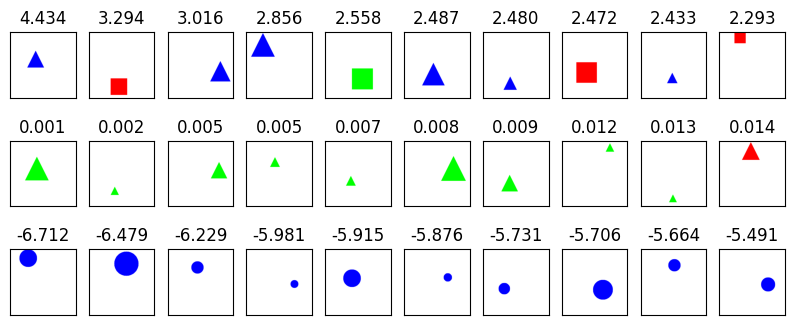

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. azure: 0.2465
	2. blue: 0.2166
	3. round: 0.1334
	4. cyan: 0.0906
	5. ruby: 0.0903
	6. crimson: 0.0744
	7. quadratic: 0.0699
	8. four: 0.0610
	9. scarlet: 0.0587
	10. corner: 0.0452
	11. navy: 0.0326
	12. left: 0.0240
	13. triangular: 0.0187
	14. rotate: 0.0148
	15. lapis: 0.0128
	16. angle: 0.0067
	17. it: 0.0039
	18. right: 0.0020
	19. up: 0.0002
	20. transparent: 0.0001
	21. unturn: 0.0000
	22. circular: 0.0000
	23. cherry: 0.0000
	24. lime: 0.0000
	25. emerald: 0.0000
	26. olive: 0.0000
	27. fern: 0.0000
	28. red: 0.0000
	29. green: 0.0000
	30. no: 0.0000
	31. three: 0.0000
	32. form: 0.0000
	33. turn: 0.0000
	34. fix: 0.0000
	35. unrotate: 0.0000
	36. locate: 0.0000
	37. blank: 0.0000
	38. picture: 0.0000
	39. static: 0.0000
	40. color: 0.0000
	41. solid: 0.0000
	42. shape: 0.0000
	43. shade: 0.0000
	4

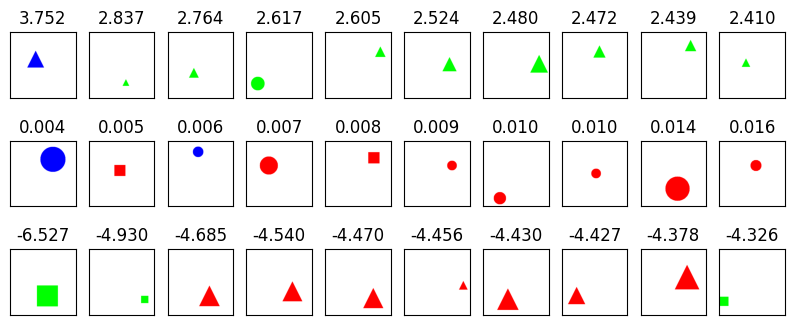

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. figure: 0.1606
	2. picture: 0.1589
	3. color: 0.1523
	4. circular: 0.1519
	5. triangular: 0.1517
	6. solid: 0.1490
	7. fix: 0.1404
	8. angle: 0.1383
	9. quadratic: 0.1362
	10. bottom: 0.1353
	11. red: 0.1305
	12. shade: 0.1264
	13. no: 0.1228
	14. corner: 0.1135
	15. four: 0.1101
	16. unturn: 0.1052
	17. turn: 0.1039
	18. scarlet: 0.1007
	19. canvas: 0.0971
	20. crimson: 0.0938
	21. unrotate: 0.0887
	22. background: 0.0866
	23. lime: 0.0857
	24. photo: 0.0822
	25. position: 0.0767
	26. right: 0.0715
	27. transparent: 0.0665
	28. white: 0.0589
	29. ruby: 0.0576
	30. cherry: 0.0533
	31. rotate: 0.0531
	32. blank: 0.0519
	33. navy: 0.0449
	34. locate: 0.0383
	35. form: 0.0376
	36. it: 0.0353
	37. image: 0.0351
	38. static: 0.0282
	39. olive: 0.0163
	40. up: 0.0123
	41. three: 0.0085
	42. round: 0.0081
	43. sha

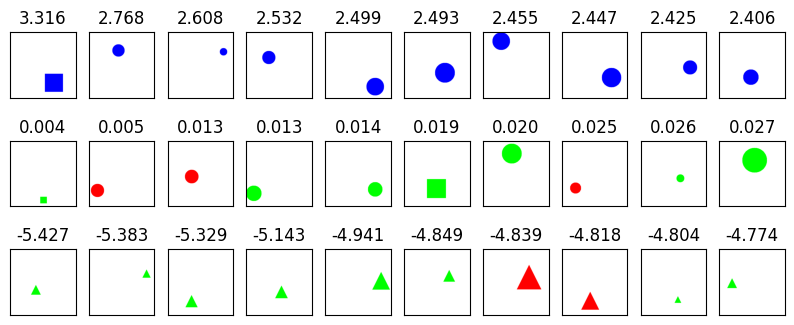

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. cyan: 0.4200
	2. lapis: 0.3454
	3. blue: 0.3108
	4. azure: 0.2961
	5. navy: 0.2728
	6. left: 0.2700
	7. round: 0.1545
	8. ruby: 0.0198
	9. rotate: 0.0181
	10. corner: 0.0159
	11. it: 0.0110
	12. scarlet: 0.0012
	13. quadratic: 0.0011
	14. four: 0.0004
	15. crimson: 0.0000
	16. right: 0.0000
	17. green: 0.0000
	18. emerald: 0.0000
	19. cherry: 0.0000
	20. lime: 0.0000
	21. red: 0.0000
	22. fern: 0.0000
	23. olive: 0.0000
	24. circular: 0.0000
	25. unturn: 0.0000
	26. triangular: 0.0000
	27. form: 0.0000
	28. static: 0.0000
	29. shape: 0.0000
	30. three: 0.0000
	31. white: 0.0000
	32. solid: 0.0000
	33. bottom: 0.0000
	34. locate: 0.0000
	35. picture: 0.0000
	36. angle: 0.0000
	37. turn: 0.0000
	38. blank: 0.0000
	39. background: 0.0000
	40. color: 0.0000
	41. position: 0.0000
	42. shade: 0.0000
	43. figure:

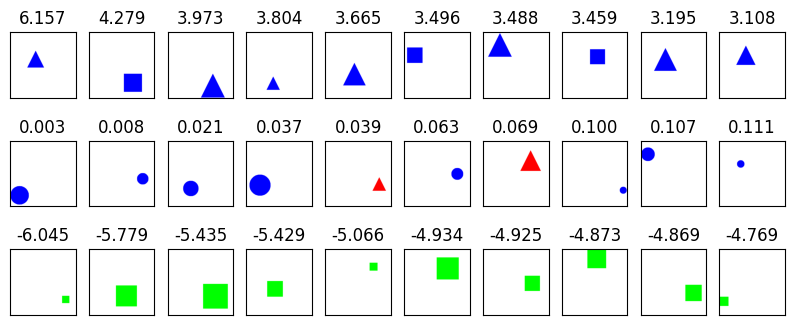

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.1190
	2. four: 0.0960
	3. angle: 0.0880
	4. ruby: 0.0657
	5. picture: 0.0651
	6. form: 0.0614
	7. transparent: 0.0581
	8. bottom: 0.0544
	9. quadratic: 0.0508
	10. unturn: 0.0494
	11. crimson: 0.0475
	12. no: 0.0413
	13. shade: 0.0189
	14. rotate: 0.0142
	15. locate: 0.0123
	16. shape: 0.0085
	17. up: 0.0079
	18. white: 0.0071
	19. right: 0.0070
	20. color: 0.0039
	21. corner: 0.0020
	22. scarlet: 0.0016
	23. position: 0.0008
	24. blue: 0.0000
	25. circular: 0.0000
	26. round: 0.0000
	27. three: 0.0000
	28. turn: 0.0000
	29. figure: 0.0000
	30. image: 0.0000
	31. <pad>: 0.0000
	32. blank: 0.0000
	33. it: 0.0000
	34. cyan: 0.0000
	35. solid: 0.0000
	36. cherry: 0.0000
	37. photo: 0.0000
	38. azure: 0.0000
	39. lime: 0.0000
	40. unrotate: 0.0000
	41. static: 0.0000
	42. fern: 0.0000
	43. navy: 

IndexError: list index out of range

In [6]:
for i in range(51):
    visualize_concept(i)